BOLETIM EPIDEMIOLóGICO DA MICRORREGIÃO DE OURO PRETO.

In [8]:
import pandas as pd
import numpy as np

#importamos o banco de dado
base_out = pd.read_excel('xlsx_sistemas_novo.xlsx',sep=';', encoding='latin-1')
base_out['contador'] = 1

In [9]:
#segundo banco de dado com o restante dos confirmados.
base_lab = pd.read_excel('xlsx_laboratorios_novo.xlsx',sep=',', encoding='latin-1')
base_lab['contador'] = 1

base_lab
base = pd.concat([base_lab, base_out], ignore_index=False)

#Limpeza e oredanção dos dados
from datetime import datetime
base['DATA_NOTIFICACAO'] = pd.to_datetime(base['DATA_NOTIFICACAO'], format='%m/%d/%Y')

base.sort_values('DATA_NOTIFICACAO', inplace=True)

In [10]:
#seleciono a regiao com a qual vou trabalhar e extrair os dados.
Microregiao_OP = base.loc[base['MICRO'] == 'OURO PRETO']

In [23]:
Microregiao_OP

,URS,MICRO,MACRO,ID,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA,CODIGO,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,RACA,DATA_ATUALIZACAO,ORIGEM_DA_INFORMACAO,contador
32143,BELO HORIZONTE,OURO PRETO,CENTRO,80115,2020-03-07,CASO CONFIRMADO,MASCULINO,NaN,NaN,MARIANA,314000.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-14,LABORATORIOS PUBLICOS E PRIVADOS,1
32185,BELO HORIZONTE,OURO PRETO,CENTRO,80157,2020-03-07,CASO CONFIRMADO,MASCULINO,NaN,NaN,OURO PRETO,314610.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-14,LABORATORIOS PUBLICOS E PRIVADOS,1
32142,BELO HORIZONTE,OURO PRETO,CENTRO,80114,2020-03-07,CASO CONFIRMADO,MASCULINO,NaN,NaN,MARIANA,314000.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-14,LABORATORIOS PUBLICOS E PRIVADOS,1
32117,BELO HORIZONTE,OURO PRETO,CENTRO,80089,2020-03-07,CASO CONFIRMADO,MASCULINO,NaN,NaN,ITABIRITO,313190.0,NAO INFORMADO,EM ACOMPANHAMENTO,NAO INFORMADO,NAO INFORMADO,NAO INFORMADO,2020-08-14,LABORATORIOS PUBLICOS E PRIVADOS,1
50,BELO HORIZONTE,OURO PRETO,CENTRO,51,2020-03-20,CASO CONFIRMADO,FEMININO,40.0,40 A 49 ANOS,MARIANA,314000.0,NAO INFORMADO,RECUPERADO,NAO,NAO,PARDA,2020-08-14,ESUS/SIVEP,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38567,BELO HORIZONTE,OURO PRETO,CENTRO,38568,NaT,CASO CONFIRMADO,MASCULINO,76.0,70 A 79 ANOS,OURO PRETO,314610.0,SIM,EM ACOMPANHAMENTO,SIM,SIM,PARDA,2020-08-14,SIVEP,1
38674,BELO HORIZONTE,OURO PRETO,CENTRO,38675,NaT,CASO CONFIRMADO,MASCULINO,68.0,60 A 69 ANOS,OURO PRETO,314610.0,NAO,EM ACOMPANHAMENTO,SIM,NAO,PARDA,2020-08-14,SIVEP,1
38681,BELO HORIZONTE,OURO PRETO,CENTRO,38682,NaT,CASO CONFIRMADO,MASCULINO,77.0,70 A 79 ANOS,OURO PRETO,314610.0,NAO,EM ACOMPANHAMENTO,SIM,SIM,PARDA,2020-08-14,SIVEP,1
38688,BELO HORIZONTE,OURO PRETO,CENTRO,38689,NaT,CASO CONFIRMADO,FEMININO,80.0,80 A 89 ANOS,OURO PRETO,314610.0,NAO,EM ACOMPANHAMENTO,SIM,SIM,PARDA,2020-08-14,SIVEP,1


In [28]:
#Microregiao_OP.groupby('INTERNACAO').contador.sum()
type(base['DATA_ATUALIZACAO'][0])

pandas.core.series.Series

In [26]:
#pd.set_option('display.max_rows', None)
lista_confirmados = Microregiao_OP.groupby(['MUNICIPIO_RESIDENCIA']).contador.sum()
tabela2 = pd.DataFrame({"Total de confirmados": lista_confirmados}).reset_index()

tabela2 = tabela2.assign(Populaçao=[51875,60724,74281])
tabela2['Prevalencia'] = round((tabela2['Total de confirmados']/tabela2['Populaçao']),4)
#tabela2['Prevalencia'] = tabela2['Prevalencia'].replace(['inf'],'NaN')
tabela2 = tabela2.reindex([2,1,0])
tabela2 = tabela2.reset_index()
tabela2 = tabela2.drop(['index'], axis=1)
tabela2

,MUNICIPIO_RESIDENCIA,Total de confirmados,Populaçao,Prevalencia
0,OURO PRETO,572,74281,0.0077
1,MARIANA,1000,60724,0.0165
2,ITABIRITO,914,51875,0.0176


PAINEL DA SRAG

In [31]:
confirmados_OP = Microregiao_OP.groupby(['DATA_NOTIFICACAO']).contador.sum()

tabelac = pd.DataFrame({"Casos novos por dia": confirmados_OP}).reset_index()
tabela = tabelac.fillna(0)

from datetime import datetime
#transformar variavel str em date
tabela['DATA_NOTIFICACAO'] = pd.to_datetime(tabela['DATA_NOTIFICACAO'], format='%Y-%m-%d')
data = pd.date_range(start='20/03/2020', end='08/12/2020')
data = data.astype('datetime64[ns]')
data = pd.DataFrame(data)

tabela['DATA_NOTIFICACAO'] = tabela['DATA_NOTIFICACAO'].astype('datetime64[ns]')
tabela = tabela.merge(data, how = 'right', left_on='DATA_NOTIFICACAO', right_on=data[0])
tabela = tabela.fillna(0)
tabela.sort_values('DATA_NOTIFICACAO', inplace=True)

tabela['Total de confirmados'] = np.cumsum(tabela['Casos novos por dia'])
tabela = tabela.rename(columns={'DATA_NOTIFICACAO': 'data'})
tabela.drop(tabela.columns[2], axis=1, inplace=True)

tabela['MA'] = tabela['Casos novos por dia'].rolling(window=7).mean()
tabela['MA'] = tabela['MA'].round(2)
tabela.tail()

,data,Casos novos por dia,Total de confirmados,MA
105,2020-08-08,4.0,2378.0,26.14
106,2020-08-09,47.0,2425.0,32.71
107,2020-08-10,15.0,2440.0,26.43
145,2020-08-11,0.0,2440.0,24.14
108,2020-08-12,7.0,2447.0,20.43


In [32]:
df = tabela['MA'].reset_index()
df.drop(df.columns[0], axis=1, inplace=True)
df = df.reset_index()
df = pd.DataFrame(df)
#df.head(10)

Text(0.5, 1.0, 'Confirmados por Covid-19 na Microrregião de Ouro Preto')

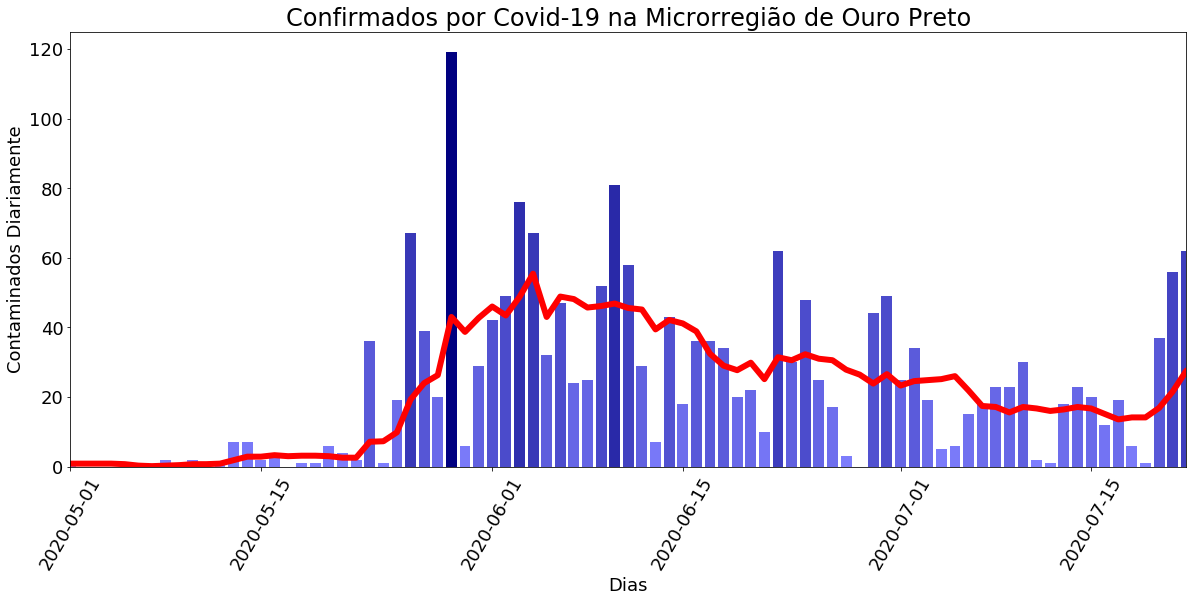

In [33]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

n_confirmados = np.array(tabela['Casos novos por dia'])

data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "blue": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "red": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    })

plt.figure(figsize=(20,8))

plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,1].values, color=color_map(data_normalizer(n_confirmados)))
plt.plot(tabela.iloc[:,0].values, tabela.iloc[:,3].values,linewidth=6, color = 'red')

plt.xlabel('Dias', size = 18)
plt.ylabel('Contaminados Diariamente',size = 18)
plt.xlim('2020-05-01', '2020-07-22') 

plt.yticks(size = 18)
plt.xticks(size = 18,rotation=60)



plt.title('Confirmados por Covid-19 na Microrregião de Ouro Preto', fontsize=24)

In [36]:
confirmados_OP = base.groupby(['DATA_NOTIFICACAO']).contador.sum()

tabelac = pd.DataFrame({"Casos novos por dia": confirmados_OP}).reset_index()
tabela = tabelac.fillna(0)

from datetime import datetime
#transformar variavel str em date
tabela['DATA_NOTIFICACAO'] = pd.to_datetime(tabela['DATA_NOTIFICACAO'], format='%Y-%m-%d')
data = pd.date_range(start='20/03/2020', end='08/12/2020')
data = data.astype('datetime64[ns]')
data = pd.DataFrame(data)

tabela['DATA_NOTIFICACAO'] = tabela['DATA_NOTIFICACAO'].astype('datetime64[ns]')
tabela = tabela.merge(data, how = 'right', left_on='DATA_NOTIFICACAO', right_on=data[0])
tabela = tabela.fillna(0)
tabela.sort_values('DATA_NOTIFICACAO', inplace=True)

tabela['Total de confirmados'] = np.cumsum(tabela['Casos novos por dia'])
tabela = tabela.rename(columns={'DATA_NOTIFICACAO': 'data'})
tabela.drop(tabela.columns[2], axis=1, inplace=True)

tabela['MA'] = tabela['Casos novos por dia'].rolling(window=7).mean()
tabela['MA'] = tabela['MA'].round(2)
tabela.tail()

,data,Casos novos por dia,Total de confirmados,MA
141,2020-08-08,592,120643,1098.86
142,2020-08-09,444,121087,1126.71
143,2020-08-10,733,121820,993.14
144,2020-08-11,367,122187,855.29
145,2020-08-12,268,122455,723.00


Text(0.5, 1.0, 'Confirmados por Covid-19 em Minas Gerais')

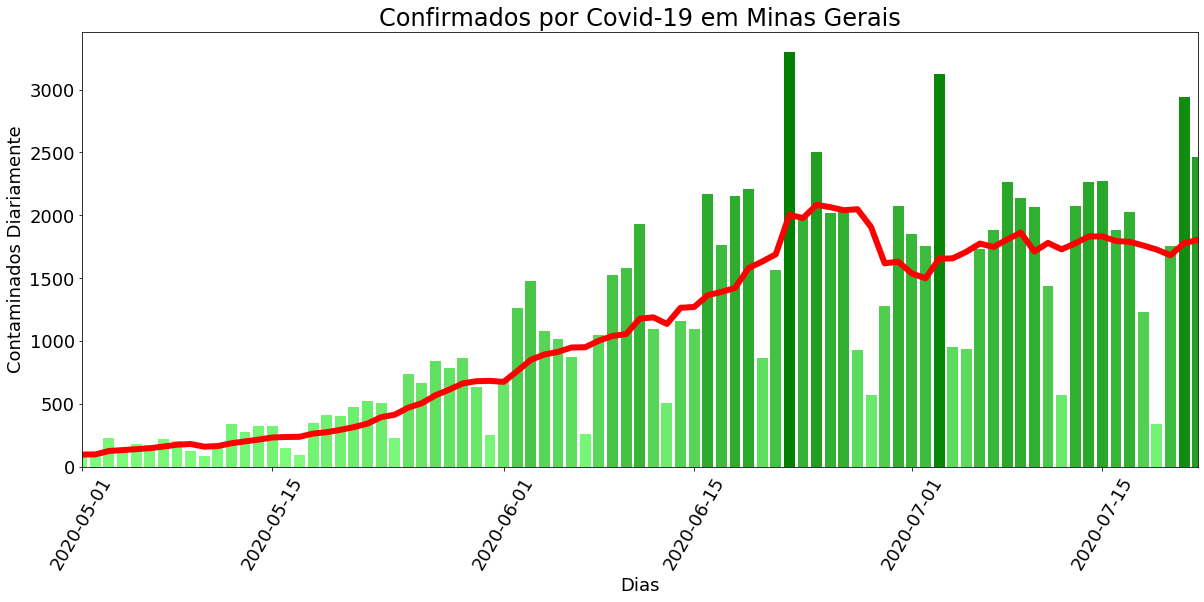

In [37]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

n_confirmados = np.array(tabela['Casos novos por dia'])

data_normalizer = mp.colors.Normalize()
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "green": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "blue": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "red": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    })

plt.figure(figsize=(20,8))

plt.bar(tabela.iloc[:,0].values, tabela.iloc[:,1].values, color=color_map(data_normalizer(n_confirmados)))
plt.plot(tabela.iloc[:,0].values, tabela.iloc[:,3].values,linewidth=6, color = 'red')

plt.xlabel('Dias', size = 18)
plt.ylabel('Contaminados Diariamente',size = 18)
plt.xlim('2020-05-01', '2020-07-22') 

plt.yticks(size = 18)
plt.xticks(size = 18,rotation=60)



plt.title('Confirmados por Covid-19 em Minas Gerais', fontsize=24)

In [65]:
tabela.to_csv("tabela_micro_OP.csv", index = False)